# Testing (to be deleted)

---

Aditya Marathe

## Imports

In [1]:
import os

import h5py

import pandas as pd

import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import dotenv

dotenv.load_dotenv();

In [3]:
import sys

sys.path.insert(1, './../')

In [4]:
from utils import *
from cuts import *

## Loading the data

In [5]:
data = h5py.File(os.environ[LocalDatasets.COPYMERGED_C9])

## Exploring the data

In [6]:
## Print all the keys (and their children) in my file

for i, key in enumerate(data.keys()):
    title = '(' + str(i + 1) + ') ' + key
    print(title)
    print('-' * len(title))
    for sub_key in data[key].keys():
        length = len(data[key][sub_key])
        print('\t' + sub_key + '\t(' + str(length) + ')')
    
    print('\n')

(1) rec.energy.numu
-------------------
	E	(141478)
	angleE	(141478)
	angleerror	(141478)
	batch	(141478)
	calccE	(141478)
	cycle	(141478)
	evt	(141478)
	hadcalE	(141478)
	hadtrkE	(141478)
	lstmmuon	(141478)
	lstmmuon_opphorn	(141478)
	lstmnu	(141478)
	lstmnu_opphorn	(141478)
	ndhadcalactE	(141478)
	ndhadcalcatE	(141478)
	ndhadcaltranE	(141478)
	ndhadtrkactE	(141478)
	ndhadtrkcatE	(141478)
	ndhadtrktranE	(141478)
	ndtrkcalactE	(141478)
	ndtrkcalcatE	(141478)
	ndtrkcaltranE	(141478)
	ndtrklenact	(141478)
	ndtrklencat	(141478)
	ndtrktranx	(141478)
	ndtrktrany	(141478)
	recomuonE	(141478)
	recotrkcchadE	(141478)
	regcvnhadE	(141478)
	regcvnhadE_opphorn	(141478)
	run	(141478)
	shiftedtrkccE	(141478)
	subevt	(141478)
	subrun	(141478)
	trkccE	(141478)
	trknonqeE	(141478)
	trkqeE	(141478)
	ucrecomuonE	(141478)
	ucrecomuonE1trk	(141478)


(2) rec.energy.numu.hadclust
----------------------------
	batch	(141478)
	boxmax.x	(141478)
	boxmax.y	(141478)
	boxmax.z	(141478)
	boxmin.x	(141478)
	boxmin

## Creating a `DataFrame`

In [7]:
def get_column(
        parent_key: str,
        child_key: str
    ):
    return data[parent_key][child_key][0:-1].flatten()

In [8]:
def get_value(
        parent_key: str, 
        child_key: str,
        run: int,
        sub_run: int,
        evt: int,
        sub_evt: int,
        cycle: int
    ):
    value_array = get_column(parent_key, child_key)
    
    bool_locator = (
        (get_column(parent_key, 'run') == run)
        & (get_column(parent_key, 'subrun') == sub_run)
        & (get_column(parent_key, 'evt') == evt)
        & (get_column(parent_key, 'subevt') == sub_evt)
        & (get_column(parent_key, 'cycle') == cycle)
    )

    return value_array[bool_locator]

In [9]:
## Variables that we will extract
# Source: Domain Generalisation with ML in the NOvA experiment by Andrew Thomas
#         Cleve Sutton (University of North Carolina at Charlotte)

useful_vars = {
    
    # Energies ----------------------------------------------------------------

    'rec.energy.numu': [
        'E',  # Old predictor
        'calccE',
        'hadcalE',
        'hadtrkE',
        'lstmmuon',  # Most recent LSTM predictors
        'lstmnu',
        'regcvnhadE',
        'trkccE',
        'recomuonE'  # --> Reconstructed energy...
    ],
    'rec.energy.numu.hadclust': [
        'calE',
        'nhit'
    ],

    # Selection stuff ---------------------------------------------------------

    'rec.sel.contain': [
        'kalfwdcell',
        'kalbakcell',
        'cosfwdcell',
        'cosbakcell'
    ],
    'rec.sel.cosrej': [
        # For FHC (Forward Horn Current)
        'numucontpid2020fhc'
    ],
    'rec.sel.cvnloosepreselptp': [
        'cosmicid',
        'ncid',
        'nueid',
        'numuid',
        'nutauid'
    ],
    'rec.sel.remid': [
        'pid'
    ],
    'rec.sel.scann': [
        'scpid'
    ],
    'rec.sel.veto': [
        'keep'
    ],

    # Slice stuff -------------------------------------------------------------

    'rec.slc': [
        'calE',  # Calorimetric energy of all hits in this slice
        'firstplane',
        'lastplane',
        'nhit',
        'ncontplanes'
    ],

    # Spill info --------------------------------------------------------------

    'rec.spill.cosmiccvn': [
        'passSel'
    ],

    # Track info --------------------------------------------------------------

    'rec.trk.cosmic': [
        'ntracks'
    ],
    'rec.trk.kalman': [
        'idxremid',
        'ntracks'
    ],
    'rec.trk.kalman.tracks': [
        'dir.x',  # --> Needed for calculating kinematics
        'dir.y',
        'dir.z',
        'nhit',
        'nhitx',
        'nhity',
        'calE',  # Calorimetric energy of all hits in the prong
        'nplane',
        'maxplanecont'
    ],

    # MC Truth ----------------------------------------------------------------

    'rec.mc': [
        'nnu'
    ],
    'rec.mc.nu': [
        'E',
        'pdg',
        'mode',
        'iscc'
    ],
    'rec.mc.nu.beam': [
        'potnum'  # Number of POT (Protons On Target)
    ]
}

In [10]:
require_manual_fill = [
    'rec.mc.nu',
    'rec.mc.nu.beam',
    'rec.training.cvnmaps',
    'rec.training.trainingdata',
    'rec.trk.kalman.tracks'
]

In [11]:
# For future reference:
# https://stackoverflow.com/questions/47531584/numpy-where-as-range-indices
# https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index

In [12]:
def get_columns_special(
        parent_key: str, 
        flatten: bool = False
    ) -> pd.DataFrame:
    """\
    
    """
    run_column = get_column(parent_key, 'run')
    subrun_column = get_column(parent_key, 'subrun')
    evt_column = get_column(parent_key, 'evt')
    subevt_column = get_column(parent_key, 'subevt')
    cycle_column = get_column(parent_key, 'cycle')

    zipped_index_array_new = np.column_stack(
        (
            run_column,
            subrun_column,
            evt_column,
            subevt_column,
            cycle_column
        )
    )

    zipped_index_array_new, index_array = np.unique(
        zipped_index_array_new, 
        axis=0, 
        return_inverse=True
    )

    multi_index_new = pd.MultiIndex.from_tuples(
        zipped_index_array_new.tolist(), 
        names=[
            'run',
            'subrun',
            'evt',
            'subevt',
            'cycle'
        ]
    )

    df_new = pd.DataFrame(index=multi_index_new)

    for child_key in useful_vars[parent_key]:
        column_values = get_column(parent_key, child_key)
        split_indices = np.where(index_array[:-1] != index_array[1:])[0] + 1
        grouped_values = np.split(column_values, split_indices)
        if flatten:
            grouped_values = np.asarray(grouped_values).flatten()
        df_new[parent_key + '.' + child_key] = grouped_values

    return df_new

In [13]:
multi_index = pd.MultiIndex.from_tuples(
    np.column_stack((
        get_column('rec.energy.numu', 'run'),
        get_column('rec.energy.numu', 'subrun'),
        get_column('rec.energy.numu', 'evt'),
        get_column('rec.energy.numu', 'subevt'),
        get_column('rec.energy.numu', 'cycle')
    )).tolist(), 
    names=[
        'run',
        'subrun',
        'evt',
        'subevt',
        'cycle'
    ]
)

df = pd.DataFrame(index=multi_index)

In [14]:
for parent_key in useful_vars:
    if parent_key in require_manual_fill:
        print('Skipped ' + parent_key)
        continue
    
    for child_key in useful_vars[parent_key]:
        df[parent_key + '.' + child_key] = get_column(parent_key, child_key)

Skipped rec.trk.kalman.tracks
Skipped rec.mc.nu
Skipped rec.mc.nu.beam


In [15]:
df_kalman = get_columns_special('rec.trk.kalman.tracks')
df_nu = get_columns_special('rec.mc.nu', flatten=True)
df_nu_beam = get_columns_special('rec.mc.nu.beam', flatten=True)

In [16]:
df = pd.merge(df, df_kalman, left_index=True, right_index=True, how='outer')
df = pd.merge(df, df_nu, left_index=True, right_index=True, how='outer')
df = pd.merge(df, df_nu_beam, left_index=True, right_index=True, how='outer')

In [17]:
# Reorder the columns...
column_order = list()

for p_key in useful_vars:
    for c_key in useful_vars[p_key]:
        column_order.append(p_key + '.' + c_key)

df = df[column_order]

In [18]:
df['rec.mc.nu.pdg'].fillna(0, inplace=True)
df['rec.mc.nu.mode'].fillna(-1, inplace=True)
df['rec.mc.nu.iscc'].fillna(0, inplace=True)
df['rec.mc.nu.beam.potnum'].fillna(0, inplace=True)

In [19]:
df_simple_index = df.reset_index()

In [20]:
df['ana.trk.kalman.tracks.npng'] = df.loc[df['rec.trk.kalman.tracks.nplane'].notnull(), 'rec.trk.kalman.tracks.nplane'].apply(len)

In [21]:
df['ana.trk.kalman.tracks.npng'].fillna(0, inplace=True)

In [22]:
df.dropna(subset=[n for n in df.columns if n.startswith('rec.energy')], inplace=True)

In [23]:
# =====================================================================
nnu_events = df['rec.mc.nnu'] > 0

nnu_events


run    subrun  evt   subevt  cycle
14850  5       2     1       0         True
               3     1       0        False
                     2       0         True
               5     1       0        False
                     2       0         True
                                      ...  
15021  2       995   1       0         True
               996   1       0        False
               997   1       0         True
               999   1       0        False
               1000  1       0        False
Name: rec.mc.nnu, Length: 141477, dtype: bool

In [24]:
# Is CC or NC?
df['ana.mc.flag.isCC'] = df['rec.mc.nu.iscc'] * nnu_events
df['ana.mc.flag.isNC'] = (df['ana.mc.flag.isCC'] < 1) * nnu_events

# Is NuMu or no?
df['ana.mc.flag.isNuMu'] = df['rec.mc.nu.pdg'] == 14
df['ana.mc.flag.isANuMu'] = df['rec.mc.nu.pdg'] == -14

# Is NuE or no?
df['ana.mc.flag.isNuE'] = df['rec.mc.nu.pdg'] == 12
df['ana.mc.flag.isANuE'] = df['rec.mc.nu.pdg'] == -12

# Is (A)NuMu CC?
df['ana.mc.flag.isNuMuCC'] = df['ana.mc.flag.isNuMu'] * df['ana.mc.flag.isCC']
df['ana.mc.flag.isANuMuCC'] = df['ana.mc.flag.isANuMu'] * df['ana.mc.flag.isCC']

# Is (A)NuE CC?
df['ana.mc.flag.isNuECC'] = df['ana.mc.flag.isNuE'] * df['ana.mc.flag.isCC']
df['ana.mc.flag.isANuECC'] = df['ana.mc.flag.isANuE'] * df['ana.mc.flag.isCC']

# df['ana.flag.isNuMuCC'] = df['ana.flag.isNuMu'] * df['ana.flag.isCC']

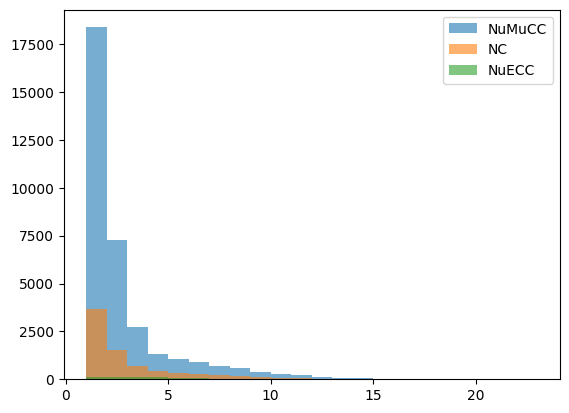

In [25]:
plt.hist(
    df[df['ana.mc.flag.isNuMuCC'] > 0]['ana.trk.kalman.tracks.npng'],
    bins=np.arange(1, 23 + 1, 1),
    label='NuMuCC',
    alpha=0.6
)

plt.hist(
    df[df['ana.mc.flag.isNC'] > 0]['ana.trk.kalman.tracks.npng'],
    bins=np.arange(1, 23 + 1, 1),
    label='NC',
    alpha=0.6
)

plt.hist(
    df[df['ana.mc.flag.isNuECC'] > 0]['ana.trk.kalman.tracks.npng'],
    bins=np.arange(1, 23 + 1, 1),
    label='NuECC',
    alpha=0.6
)

# plt.yscale('log')

plt.legend();

In [26]:
len(df[df['ana.mc.flag.isNC'] > 0])

9437

In [27]:
df[df['ana.mc.flag.isNuE'] > 0]['ana.mc.flag.isNC'].value_counts()

ana.mc.flag.isNC
False    748
True     230
Name: count, dtype: int64

# Track kinematics

In [28]:
# Calculate the track kinematics
# The code below is directly copied from the `pidFunWithScann.ipynb` module

# Idea: The data from the FD is in a different coordinate system to the data 
#       used for the NuMI simulation. Hence, we need to make some convertations
#       before we can start calculating the track kinematics.


In [29]:
# Cos Beam =kalman_tracks.dir . r_fd_beam_dir_unit 
# Transverse momentum = 1 - cos^2 Beam
# Momentum = Transverse momentum * Muon momentum
# Q^2 (reco) = ...
# W (reco) = ...

In [30]:
pmu = np.sqrt(data['rec.energy.numu']['lstmmuon'][:10]*data['rec.energy.numu']['lstmmuon'][:10] - (105.658e-3)**2)
cosBeam = (
    data['rec.trk.kalman.tracks']['dir.x'][:10] * r_fd_beamDirUnit[0]
    + data['rec.trk.kalman.tracks']['dir.y'][:10] * r_fd_beamDirUnit[1]
    + data['rec.trk.kalman.tracks']['dir.z'][:10] * r_fd_beamDirUnit[2]
)
cosBeamFirst = cosBeam[0, :]

2*data['rec.energy.numu']['lstmnu'][:10] * (data['rec.energy.numu']['lstmmuon'][:10]-pmu*cosBeam-(105.658e-3)**2)


NameError: name 'r_fd_beamDirUnit' is not defined

In [ ]:
cosBeam

array([[0.96443623],
       [0.5310756 ],
       [0.25507995],
       [0.32817587],
       [0.9154204 ],
       [0.02694734],
       [0.02855202],
       [0.5788013 ],
       [0.8956809 ],
       [0.7513734 ]], dtype=float32)

In [ ]:
data['rec.mc.nu']['q2'][:10]

array([[1.4616544 ],
       [1.7843751 ],
       [0.27812406],
       [0.8682408 ],
       [0.87109154],
       [0.28018606],
       [0.3196171 ],
       [0.45522356],
       [0.67568856],
       [0.07426848]], dtype=float32)

In [ ]:
## FD Transform

# r_offset vector
r_off_fd = np.array(
    [57.666820, -51777.408547, -808852.640542]
)

# rotationa matrix
m_rot_fd = np.array(
    [
        [0.99990622174    , 0.000472822894411, 0.0136866417481],
        [0.000472822894411, 0.997616062703   , -0.0690070132296],
        [-0.0136866417481 , 0.0690070132296  , 0.997522284444]
    ]
)

m_rot_fd_inv = np.linalg.inv(m_rot_fd)

## ND Transform

# r_offset vector
r_off_nd=np.array(
    [2.269447, 61.001882, -991.131313]
) 

# rotation matrix
m_rot_nd=np.array(
    [
        [0.99990   , 3.0533E-6 , 1.4112E-2],
        [8.2300E-4 , 0.99831   , 5.8097E-2],
        [-1.4088E-2, -5.8103E-2, 0.99821]
    ]
)

m_rot_nd_inv = np.linalg.inv(m_rot_nd)

# Block centres from the survey measurements in e.g. DocDb-13501

fdBlkCtr = np.array([11037.705436,-4164.619757,810452.13544])
ndBlkCtr = np.array([11.793636,-2.928869,999.282492])

pointS = np.array([0,0,170.399278])

mczero = np.array([0,0,0])

point100 = np.array([0,0,100])
point600 = np.array([0,0,600])
point800 = np.array([0,0,800])


def convFDtoNuMI(r_fd):
    return np.matmul(m_rot_fd,r_fd-r_off_fd)


def convNuMItoFD(r_numi):
    return np.matmul(m_rot_fd_inv,r_numi)+r_off_fd


def convNDtoNuMI(r_nd):
    return np.matmul(m_rot_nd,r_nd-r_off_nd)


def convNuMItoND(r_numi):
    return np.matmul(m_rot_nd_inv,r_numi)+r_off_nd


r_fd=np.array([0,0,60])
print(convFDtoNuMI(r_fd))


def getDirAtDetectorFromPoint(whichDet,point):
    if whichDet == "FD":
        fdCentFromPoint = fdBlkCtr - point
        fdCentDist = np.linalg.norm(fdCentFromPoint)
        fdCfP = fdCentFromPoint / np.linalg.norm(fdCentFromPoint)
        r_fd_beamFront = convNuMItoFD(pointS + (fdCentDist - 29.942) * fdCfP)
        r_fd_beamBack = convNuMItoFD(pointS + (fdCentDist + 29.942) * fdCfP)
        r_fd_beamDir = r_fd_beamBack - r_fd_beamFront

        return r_fd_beamDir
    
    elif whichDet == "ND":
        ndCentFromPoint=ndBlkCtr-point
        ndCentDist=np.linalg.norm(ndCentFromPoint)
        ndCfP=ndCentFromPoint/np.linalg.norm(ndCentFromPoint)
        r_nd_beamFront=convNuMItoND(pointS+(ndCentDist - 29.942) * ndCfP)
        r_nd_beamBack=convNuMItoND(pointS+(ndCentDist + 29.942) * ndCfP)
        r_nd_beamDir=r_nd_beamBack-r_nd_beamFront
        
        return r_nd_beamDir
    
    else:
        print("Don't have detector", whichDet)
        
        
r_fd_beamDir = getDirAtDetectorFromPoint("FD", pointS)
r_fd_beamDirUnit = r_fd_beamDir / np.linalg.norm(r_fd_beamDir)

print("r_fd_beamDir", r_fd_beamDir)
print("r_fd_beamDirUnit", r_fd_beamDirUnit)
r_nd_beamDir = getDirAtDetectorFromPoint("ND", pointS)
r_nd_beamDirUnit = r_nd_beamDir / np.linalg.norm(r_nd_beamDir)

for point in [mczero,point100,pointS,point600,point800]:
    print(point)
    rp = getDirAtDetectorFromPoint("ND", point)
    rp /= np.linalg.norm(rp)
    print("\t", rp, 180 * np.arctan(rp[0] / rp[2]) / np.pi, 180 * np.arctan(rp[1] / rp[2]) / np.pi)

print("r_nd_beamDir", r_nd_beamDir, 180 * np.arctan(r_nd_beamDir[1] / r_nd_beamDir[2]) / np.pi)
print("r_nd_beamDirUnit", r_nd_beamDirUnit)


[ 11038.11764868  -4166.69810204 810482.17869079]
r_fd_beamDir [-4.08908094e-03  3.82534312e+00  5.97616950e+01]
r_fd_beamDirUnit [-6.82833636e-05  6.38792185e-02  9.97957635e-01]
[0 0 0]
	 [-0.00228449 -0.06102058  0.99813389] -0.13113611583944212 -3.498404261662031
[  0   0 100]
	 [-9.72040557e-04 -6.13470174e-02  9.98116025e-01] -0.055798927645348176 -3.5171352997696474
[  0.         0.       170.399278]
	 [ 1.41822179e-04 -6.16239720e-02  9.98099427e-01] 0.008141285333660259 -3.5330320844841254
[  0   0 600]
	 [ 0.01544502 -0.0654208   0.99773823] 0.8868699638910319 -3.751462511134568
[  0   0 800]
	 [ 0.04501506 -0.07271388  0.99633646] 2.5868974399857207 -4.1741174416391935
r_nd_beamDir [ 8.49288940e-03 -3.69029431e+00  5.97702568e+01] -3.5330320844841254
r_nd_beamDirUnit [ 1.41822179e-04 -6.16239720e-02  9.98099427e-01]


In [ ]:
# Calculating the track kinematics
# Again, this code is adapted from the `pidFunWithScann.ipynb` module

In [ ]:
# Proton mass (GeV^-1)
M_p = 0.938272

In [ ]:
def fillTrackKinematics(td: dict) -> None:
    # Cos(Theta) of the angle between the muon track and original track

    # Calculation:
    # (Kalman track direction vector) . (FD beam direction vector) = | // | | // | cos(theta)
    # cos(theta) = ( // . // ) / (| // | | // |) = ( // . // ) since they are unit vectors... 

    td['ana.trk.kalman.cosBeam'] = (
        td['rec.trk.kalman.tracks.dir.x'] * r_fd_beamDirUnit[0] 
        + td['rec.trk.kalman.tracks.dir.y'] * r_fd_beamDirUnit[1] 
        + td['rec.trk.kalman.tracks.dir.z'] * r_fd_beamDirUnit[2]
    )

    # Momentum stuff
    
    # Tranverse Momentum / Muon Momentum
    td['der.ptpmuRatio'] = np.sqrt(1 - td['cosBeamFirst'] * td['cosBeamFirst'])
    
    # Muon Momentum
    td['der.pmu']=np.sqrt(td['rec.energy.numu.lstmmuon']*td['rec.energy.numu.lstmmuon'] - (105.658e-3)**2)
    
    # Transverse Momentum
    td['der.pt'] = td['der.ptpmuRatio'] * td['der.pmu']

    # Q^2 and W
    td['recoQ2']= 2 * td['rec.energy.numu.lstmnu'] * (td['rec.energy.numu.lstmmuon'] - td['pmu'] * td['cosBeamFirst']) - (105.658e-3)**2
    td['recoW'] = np.sqrt(M_p * M_p + 2 * M_p * (td['rec.energy.numu.lstmnu'] - td['rec.energy.numu.lstmmuon']) - td['recoq2'])


In [ ]:
cosBeam = (
    df['rec.trk.kalman.tracks.dir.x'] * r_fd_beamDirUnit[0] 
    + df['rec.trk.kalman.tracks.dir.y'] * r_fd_beamDirUnit[1] 
    + df['rec.trk.kalman.tracks.dir.z'] * r_fd_beamDirUnit[2]
)

ptp = (1- cosBeam**2)**0.5
pmu = np.sqrt(df['rec.energy.numu.lstmmuon']**2 - (105.658E-3)**2)
pt = ptp * pmu

Q2 = 2 * df['rec.energy.numu.lstmnu'] * (df['rec.energy.numu.lstmmuon'] - pmu * cosBeam) - (105.658E-3)**2
W = (M_p * M_p + 2 * M_p * (df['rec.energy.numu.lstmnu'] - df['rec.energy.numu.lstmmuon']) - Q2)**0.5

# POT stuff

In [49]:
v, be = np.histogram(
    data['rec.mc.nu']['E'][:].flatten(),
    bins=np.linspace(0, 10, 100)
)

bin_centers = 0.5 * (be[:-1] + be[1:])

In [50]:
pot = data['rec.mc.nu.beam']['potnum'][:].flatten()
pot

array([497322, 498247,     85, ..., 301142, 302849, 306425])

In [51]:
import matplotlib.pyplot as plt

In [52]:
df_nu_beam

rec.mc.nu.beam.potnum
run   subrun evt subevt cycle                       
14850 5      2   1      0                     497322
             3   2      0                     498247
             5   2      0                         85
             7   3      0                       8419
             9   1      0                      21724
...                                              ...
15021 2      988 1      0                     291247
             991 1      0                     293606
             992 1      0                     296996
             995 1      0                     301142
             997 1      0                     302849

[46961 rows x 1 columns]

In [67]:
pot_arr = pot[:]
one_over_pot = 1 / pot_arr

C:\Users\Shrey\AppData\Local\Temp\ipykernel_1772\523687684.py:2: RuntimeWarning: divide by zero encountered in divide
  one_over_pot = 1 / pot_arr


In [68]:
one_over_pot[one_over_pot == np.inf] = 0

In [75]:
vw, _ = np.histogram(
    data['rec.mc.nu']['E'][:].flatten(),
    bins=np.linspace(0, 10, 100),
    weights=pot
)

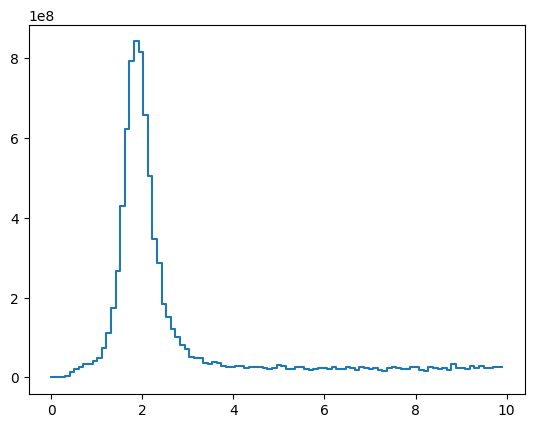

In [76]:
# plt.bar(bin_centers, v / potnum, width=be[1] - be[0]);
plt.step(be[:-1], vw);
